In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pyvista
import ufl
import time
from matplotlib import font_manager
from pathlib import Path
import matplotlib as mpl
from mpi4py import MPI
from petsc4py import PETSc
from dolfinx import fem, mesh, plot, nls, log, io
from dolfinx import cpp as _cpp
import meshio
import os
import seaborn as sns
# import json
import sys

sys.path.append('../')
%load_ext autoreload
%autoreload 2

from src.utils import *
from src.model import *

In [2]:
L = 200
a = 3

vertex = [L,2*a,2*a]
num_nodes = [100,6,6]
domain = mesh.create_box(MPI.COMM_WORLD, [[0.0, 0.0, 0.0], vertex], 
                         num_nodes, mesh.CellType.tetrahedron) 

results_folder = r"../results-data/"
exp_folder = "slab_test_200um"

model = PerfusionGasExchangeModel(mesh_path=None,
                                  results_path=results_folder,
                                  exp_path=exp_folder,
                                  params=None)

max_dims = vertex
min_dims = [0,0,0]

model.Setup(domain, max_dims = max_dims, min_dims = min_dims, atol=1E-10) # infinite=True
model.parameter_setup()

max_dims = [200, 6, 6]
min_dims = [0, 0, 0]
Total number = 4944
Inlet number = 72
Outlet number = 72
Air number = 4800


In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

font_path = '/home/bnherrerac/Helvetica-Font/Helvetica.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [4]:
## Single loop test

model.p_params["uin"] = 800/3
p, u = model.Perfusion(domain, plot=False, save=False)

p_val = 0
guess = model.GasExchange(domain, guess=None, save=False, 
                          plot=False, p_val = p_val, 
                          postprocess=False, plot_lines=False)
N = 3
for i in range(N):
    p_val += 1/N
    if i != N-1:
        guess = model.GasExchange(domain, guess=guess, save=False, 
                                  plot=False, p_val = p_val, 
                                  postprocess=False, plot_lines=False)
    else:
        guess = model.GasExchange(domain, guess=guess, save=True, 
                                  plot=False, p_val = p_val, 
                                  postprocess=True, plot_lines=True)

Problem instanced.
Pressure field found.
Finite element is CG


2024-04-27 16:47:39.316 (   7.773s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:39.444 (   7.901s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:39.490 (   7.946s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.53717e-12 (tol = 1e-08) r (rel) = 4.68794e-16(tol = 1e-08)
2024-04-27 16:47:39.490 (   7.946s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.3333333333333333


2024-04-27 16:47:40.167 (   8.624s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:40.827 (   9.284s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:40.973 (   9.429s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 105.291 (tol = 1e-08) r (rel) = 0.220203(tol = 1e-08)
2024-04-27 16:47:41.428 (   9.884s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:41.591 (  10.047s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 56.3907 (tol = 1e-08) r (rel) = 0.117934(tol = 1e-08)
2024-04-27 16:47:42.064 (  10.520s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:42.214 (  10.670s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 7 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.6666666666666666


2024-04-27 16:47:44.734 (  13.190s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:45.430 (  13.886s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:45.571 (  14.028s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 19.5219 (tol = 1e-08) r (rel) = 0.114502(tol = 1e-08)
2024-04-27 16:47:46.019 (  14.476s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:46.161 (  14.618s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.83346 (tol = 1e-08) r (rel) = 0.00488851(tol = 1e-08)
2024-04-27 16:47:46.707 (  15.163s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:46.858 (  15.314s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-27 16:47:48.143 (  16.599s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:48.815 (  17.271s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:48.973 (  17.429s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 9.81479 (tol = 1e-08) r (rel) = 0.077343(tol = 1e-08)
2024-04-27 16:47:49.442 (  17.898s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:49.584 (  18.041s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.143104 (tol = 1e-08) r (rel) = 0.00112769(tol = 1e-08)
2024-04-27 16:47:50.066 (  18.523s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-27 16:47:50.211 (  18.668s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteratio

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 0.08482646942138672 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 40), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 41), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 42), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 43), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (Bas

In [5]:
model.zs

array([3. , 4.5, 6. ])

In [6]:
model.results_dict["p_O2"]['3.0']

array([[ 40.00264257],
       [ 40.53167974],
       [ 41.06071691],
       [ 41.58975408],
       [ 42.11879125],
       [ 42.64782842],
       [ 43.17686559],
       [ 43.70590276],
       [ 44.23493994],
       [ 44.76397711],
       [ 45.29563107],
       [ 46.00034902],
       [ 46.70506698],
       [ 47.40978493],
       [ 48.11450288],
       [ 48.81922084],
       [ 49.52393879],
       [ 50.22865674],
       [ 50.9333747 ],
       [ 51.63809265],
       [ 52.34651023],
       [ 53.20043536],
       [ 54.05436049],
       [ 54.90828562],
       [ 55.76221075],
       [ 56.61613588],
       [ 57.47006101],
       [ 58.32398614],
       [ 59.17791127],
       [ 60.0318364 ],
       [ 60.88916959],
       [ 61.84132271],
       [ 62.79347584],
       [ 63.74562897],
       [ 64.6977821 ],
       [ 65.64993523],
       [ 66.60208836],
       [ 67.55424149],
       [ 68.50639461],
       [ 69.45854774],
       [ 70.40991609],
       [ 71.34447133],
       [ 72.27902658],
       [ 73

In [7]:
# Slice-averaged values along flow direction, Zurita

p_O2_zurita = []
z_O2_zurita = []
with open("./csv-results/p_O2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_O2_zurita.append(row.split(",")[0])
            z_O2_zurita.append(row.split(",")[1])
        i += 1

p_O2_zurita = np.asarray(p_O2_zurita, float)
z_O2_zurita = np.asarray(z_O2_zurita, float)/(800/3)

p_CO2_zurita = []
z_CO2_zurita = []
with open("./csv-results/p_CO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            p_CO2_zurita.append(row.split(",")[0])
            z_CO2_zurita.append(row.split(",")[1])
        i += 1

p_CO2_zurita = np.asarray(p_CO2_zurita, float)
z_CO2_zurita = np.asarray(z_CO2_zurita, float)/(800/3)

c_HbO2_zurita = []
z_HbO2_zurita = []
with open("./csv-results/c_HbO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbO2_zurita.append(row.split(",")[0])
            z_HbO2_zurita.append(row.split(",")[1])
        i += 1

c_HbO2_zurita = np.asarray(c_HbO2_zurita, float)
z_HbO2_zurita = np.asarray(z_HbO2_zurita, float)/(800/3)

c_HbCO2_zurita = []
z_HbCO2_zurita = []
with open("./csv-results/c_HbCO2_zurita.csv", "r") as file:
    i = 0
    for row in file:
        if i != 0:
            c_HbCO2_zurita.append(row.split(",")[0])
            z_HbCO2_zurita.append(row.split(",")[1])
        i += 1

c_HbCO2_zurita = np.asarray(c_HbCO2_zurita, float)
z_HbCO2_zurita = np.asarray(z_HbCO2_zurita, float)/(800/3)

In [38]:
# Slice-averaged values along flow direction, Herrera

# p_O2_herrera = []
# z_O2_herrera = []
# with open("./csv-results/p_O2_herrera.csv", "r") as file:
#     i = 0
#     for row in file:
#         if i != 0:
#             p_O2_herrera.append(row.split(",")[0])
#             z_O2_herrera.append(row.split(",")[3])
#         i += 1

# p_O2_herrera = np.asarray(p_O2_herrera, float)
# z_O2_herrera = np.asarray(z_O2_herrera, float)/(800/3)

# p_CO2_herrera = []
# z_CO2_herrera = []
# with open("./csv-results/p_CO2_herrera.csv", "r") as file:
#     i = 0
#     for row in file:
#         if i != 0:
#             p_CO2_herrera.append(row.split(",")[0])
#             z_CO2_herrera.append(row.split(",")[3])
#         i += 1

# p_CO2_herrera = np.asarray(p_CO2_herrera, float)
# z_CO2_herrera = np.asarray(z_CO2_herrera, float)/(800/3)

# c_HbO2_herrera = []
# z_HbO2_herrera = []
# with open("./csv-results/s_HbO2_herrera.csv", "r") as file:
#     i = 0
#     for row in file:
#         if i != 0:
#             c_HbO2_herrera.append(row.split(",")[0])
#             z_HbO2_herrera.append(row.split(",")[3])
#         i += 1

# c_HbO2_herrera = model.dash_params["Hb_bl"]*np.asarray(c_HbO2_herrera, float)
# z_HbO2_herrera = np.asarray(z_HbO2_herrera, float)/(800/3)

# c_HbCO2_herrera = []
# z_HbCO2_herrera = []
# with open("./csv-results/s_HbCO2_herrera.csv", "r") as file:
#     i = 0
#     for row in file:
#         if i != 0:
#             c_HbCO2_herrera.append(row.split(",")[0])
#             z_HbCO2_herrera.append(row.split(",")[3])
#         i += 1

# c_HbCO2_herrera = model.dash_params["Hb_bl"]*np.asarray(c_HbCO2_herrera, float)
# z_HbCO2_herrera = np.asarray(z_HbCO2_herrera, float)/(800/3)

In [8]:
# Experimental - Equilibrium time calculation.

d = model.results_dict["p_O2"]['3.0']
for i in range(d.shape[0]):
    if np.abs(d[i] - 100) <= 0.5:
        print(f"O2 equilibrium reached at {round(model.x[i], 2)} um = {round(model.x[i], 2)/(800/3)*(1000)} ms.") 
        break

O2 equilibrium reached at 22.22 um = 83.325 ms.


In [40]:
# Experimental - CO2 fractions in whole blood.

# bic_content = model.results_dict["bic"]['3.0']
# dissolved_content = model.dash_params["W_bl"]*model.dash_params["beta_CO2"]*model.results_dict["p_CO2"]['3.0']
# bound_content = 4*model.dash_params["Hb_bl"]*model.results_dict["S_HbCO2"]['3.0']
# total_content = bic_content + dissolved_content + bound_content

# bic_fraction = bic_content/total_content
# dissolved_fraction = dissolved_content/total_content
# bound_fraction = bound_content/total_content

# initial_values = np.array([bic_fraction[0], dissolved_fraction[0], bound_fraction[0]]).reshape((3,))
# final_values = np.array([bic_fraction[-1], dissolved_fraction[-1], bound_fraction[-1]]).reshape((3,))

# funcs = {
#     r'[HCO$\mathdefault{_3^-}$]': bic_content.reshape((1000,)),
#     'Dissolved': dissolved_content.reshape((1000,)),
#     'Bound': bound_content.reshape((1000,)),
#     # 'Total': total_content.reshape((1000,))
# }

# fractions = {
#     r'[HCO$\mathdefault{_3^-}$]': bic_fraction.reshape((1000,)),
#     'Dissolved': dissolved_fraction.reshape((1000,)),
#     'Bound': bound_fraction.reshape((1000,)),
# }

# labels = [r'[HCO$\mathdefault{_3^-}$]', 'Dissolved', 'Bound']

# fig, ax = plt.subplots(figsize=(2.7,2), dpi=300, layout='constrained')

# rg = [0,60]
# bottom=np.zeros(2)
# for i in range(3):
#     ax.bar(rg, np.array([initial_values[i], final_values[i]]), width=50, label=labels[i], bottom=bottom)
#     bottom += np.array([initial_values[i], final_values[i]])

# ax.set_xticks([0,60])
# ax.set_xticklabels(["Initial", "Final"])
# ax.tick_params(axis='both', labelsize=10)
# plt.show()

In [41]:
# Diffusing capacity - horizontal bars

# fig, ax = plt.subplots(figsize=(2.7,1.5), dpi=300, layout='constrained')

# labs = [r'$\mathdefault{0.611}$', r'$\mathdefault{0.711}$', r'$\mathdefault{0.794}$', r'$\mathdefault{0.866}$']
# ypos = np.arange(len(labs))
# dlo2 = [56.346, 43.048, 33.425, 21.770]
# dlco2 = [1763.267, 1346.074, 1080.559, 631.974]
# ax.axvspan(21, 65, facecolor='#66BB6A', alpha=0.7)
# ax.axvspan(0, 21, facecolor='#BDBDBD', alpha=0.7)
# # my_cmap = plt.get_cmap('viridis')
# # rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
# ax.barh(ypos, dlo2, color='dodgerblue', height=0.5, align='center', edgecolor='black', linewidth=0.3)
# # ax.barh(ypos, dlco2, height=-0.3, align='edge')
# ax.set_yticks(ypos, labels=labs)
# ax.set_ylabel(r"$\phi$", size=10, rotation='horizontal', loc='center')
# ax.invert_yaxis()
# ax.set_xlabel(r"DL$\mathdefault{_{O_2}}$ [mL min$\mathdefault{^{-1}}$ mmHg$\mathdefault{^{-1}}$]", size=10)
# ax.set_xlim(0, 65)
# ax.set_xticks([0,20,40,60])
# ax.tick_params(axis='both', labelsize=10)

# plt.savefig("./figs/DLO2.pdf", transparent=True)

# fig, ax = plt.subplots(figsize=(2.7,1.5), dpi=300, layout='constrained')
# dlco2 = [1763.267, 1346.074, 1080.559, 631.974]
# ax.axvspan(400, 1300, facecolor='#66BB6A', alpha=0.7)
# ax.axvspan(0, 400, facecolor='#BDBDBD', alpha=0.7)
# ax.barh(ypos, dlco2, color='dodgerblue', height=0.5, align='center', edgecolor='black', linewidth=0.3)
# ax.set_yticks(ypos, labels=labs)
# ax.set_ylabel(r"$\phi$", size=10, rotation='horizontal', loc='center')
# ax.invert_yaxis()
# ax.set_xlabel(r"DL$\mathdefault{_{CO_2}}$ [mL min$\mathdefault{^{-1}}$ mmHg$\mathdefault{^{-1}}$]", size=10)
# ax.set_xlim(0, 1800)
# ax.set_xticks([0,450,900,1350,1800])
# ax.tick_params(axis='both', labelsize=10)

# plt.savefig("./figs/DLCO2.pdf", transparent=True)

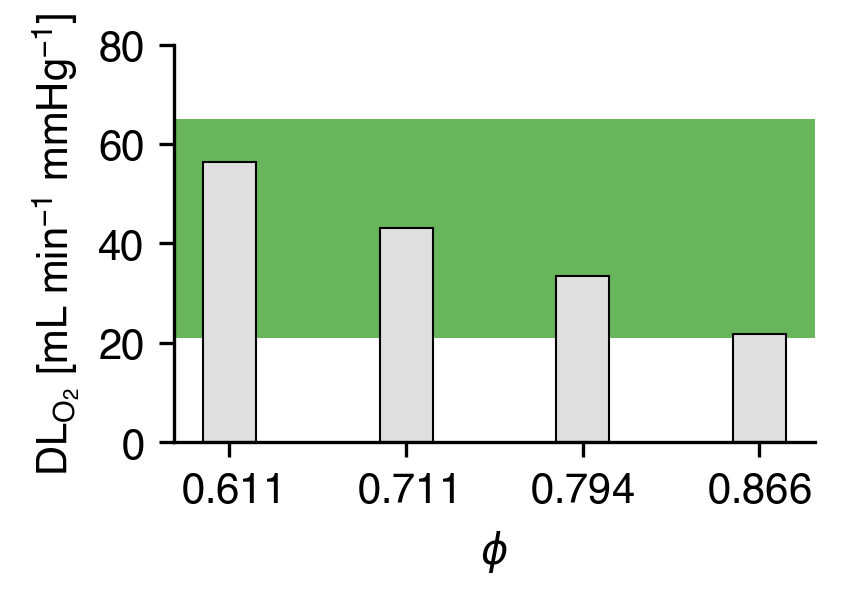

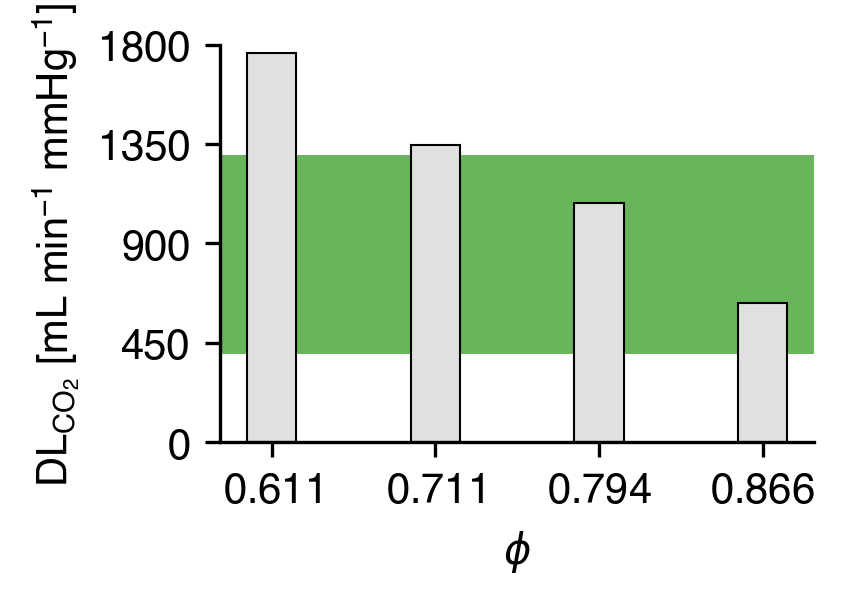

In [42]:
# Diffusing capacity - vertical bars

fig, ax = plt.subplots(figsize=(2.7,1.9), dpi=300, layout='constrained')

labs = [r'$\mathdefault{0.611}$', r'$\mathdefault{0.711}$', r'$\mathdefault{0.794}$', r'$\mathdefault{0.866}$']
xpos = np.arange(len(labs))
dlo2 = [56.346, 43.048, 33.425, 21.770]
dlco2 = [1763.267, 1346.074, 1080.559, 631.974]

ax.axhspan(21, 65, facecolor='#299617', alpha=0.7, zorder=1)

ax.bar(xpos, dlo2, color='#E0E0E0', width=0.3, align='center', edgecolor='black', linewidth=0.5, zorder=2)
ax.set_xticks(xpos, labels=labs)
ax.set_xlabel(r"$\phi$", size=10, rotation='horizontal', loc='center')

ax.set_ylabel(r"DL$\mathdefault{_{O_2}}$ [mL min$\mathdefault{^{-1}}$ mmHg$\mathdefault{^{-1}}$]", size=10)
ax.set_ylim(0, 65)
ax.set_yticks([0,20,40,60,80])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)
plt.savefig("./figs/DLO2.pdf", transparent=True)



fig, ax = plt.subplots(figsize=(2.7,1.9), dpi=300, layout='constrained')
dlco2 = [1763.267, 1346.074, 1080.559, 631.974]

ax.axhspan(400, 1300, facecolor='#299617', alpha=0.7, zorder=1)

ax.bar(xpos, dlco2, color='#E0E0E0', width=0.3, align='center', edgecolor='black', linewidth=0.5, zorder=2)
ax.set_xticks(xpos, labels=labs)
ax.set_xlabel(r"$\phi$", size=10, rotation='horizontal', loc='center')

ax.set_ylabel(r"DL$\mathdefault{_{CO_2}}$ [mL min$\mathdefault{^{-1}}$ mmHg$\mathdefault{^{-1}}$]", size=10)
ax.set_ylim(0, 1800)
ax.set_yticks([0,450,900,1350,1800])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)
plt.savefig("./figs/DLCO2.pdf", transparent=True)

In [10]:
# Importing Birghenti et al. values recovered from plot digitizer.

p_O2_birghenti = []
x_O2_birghenti = []
with open("./csv-results/birghenti_po2.csv", "r") as file:
    for row in file:
            p_O2_birghenti.append(float(row.split(";")[1].strip("\n").strip().replace(',', '.')))
            x_O2_birghenti.append(float(row.split(";")[0].strip("\n").strip().replace(',', '.')))

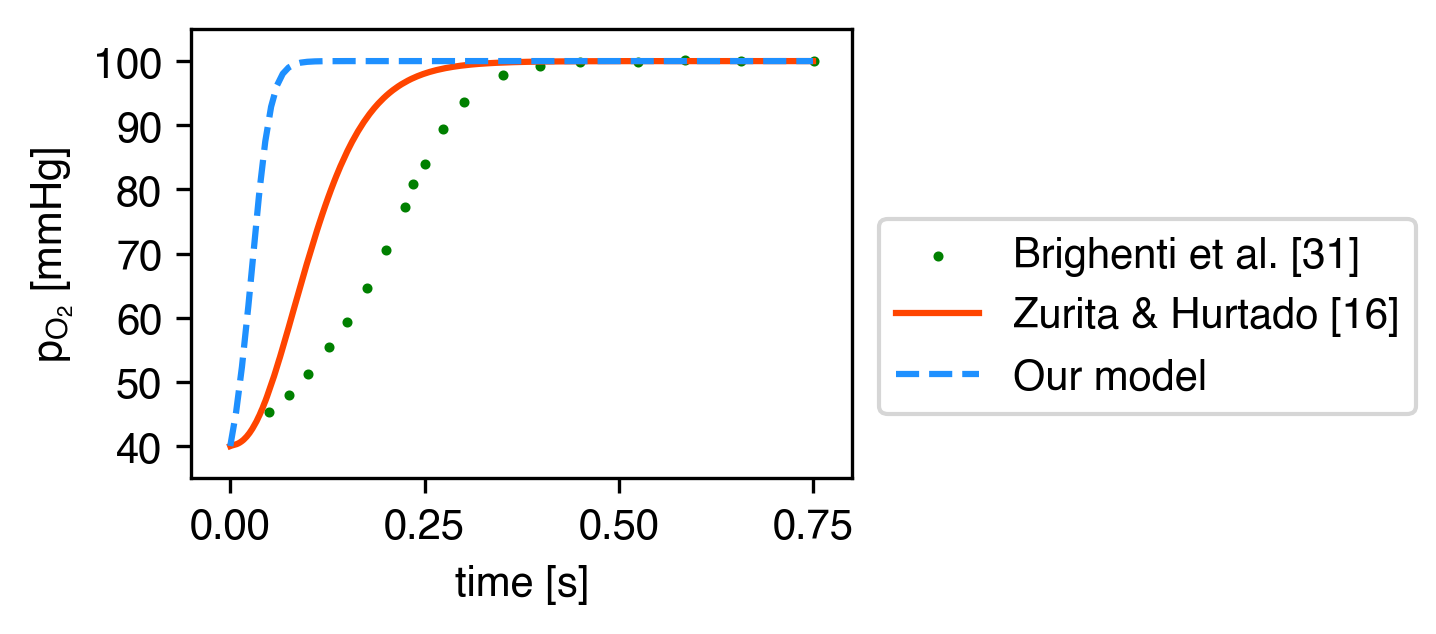

In [11]:
# PO2 comparison between models.

fig, ax = plt.subplots(figsize=(4.7,2), dpi=300, layout='constrained')

ax.scatter(x_O2_birghenti[:-2], p_O2_birghenti[:-2], s=2, color='green', label='Brighenti et al. [31]')
ax.plot(z_O2_zurita, p_O2_zurita, color='orangered', label='Zurita & Hurtado [16]')
ax.plot(model.x/(800/3), model.results_dict["p_O2"]['3.0'], '--', color='dodgerblue', label=r'Our model')

ax.set_xlabel(r"time [s]", size=10)
ax.set_xticks([0,0.25,0.50,0.75])
ax.set_xlim(-0.05, 0.8)
ax.set_ylim(35, 105)
ax.set_yticks([40,50,60,70,80,90,100])
ax.set_ylabel(r"$\mathdefault{p_{O_2}}$ [mmHg]", size=10)
ax.tick_params(axis='both', labelsize=10)
fig.legend(loc='outside center right')
plt.savefig("./figs/pO2comp.pdf", transparent=True)

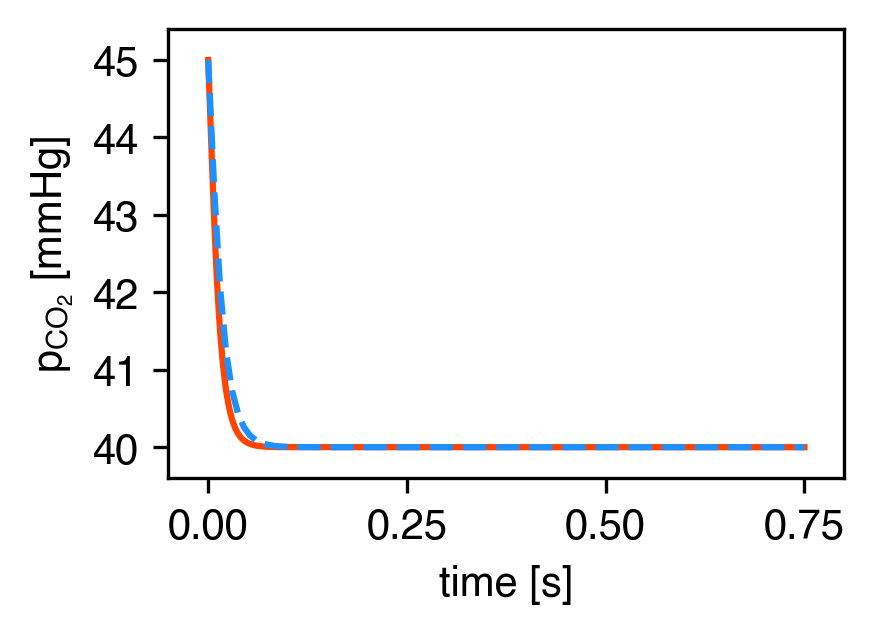

In [12]:
fig, ax = plt.subplots(figsize=(2.8,2), dpi=300, layout='constrained')
ax.plot(z_CO2_zurita, p_CO2_zurita, color='orangered', label='[15]')
ax.plot(model.x/(800/3), model.results_dict["p_CO2"]['3.0'], '--', color='dodgerblue', label=r'Our model')

ax.set_xlabel(r"time [s]", size=10)
ax.set_ylim(39.6, 45.4)
ax.set_yticks([40,41,42,43,44,45])
ax.set_xticks([0,0.25,0.50,0.75])
ax.set_xlim(-0.05, 0.8)

ax.set_ylabel(r"$\mathdefault{p_{CO_2}}$ [mmHg]", size=10)
ax.tick_params(axis='both', labelsize=10)
# ax.legend()
plt.savefig("./figs/pCO2comp.pdf", transparent=True)

In [46]:
# .csv to array conversion

def csv_avgs_processing(path):
    y = []
    x = []
    with open(path, "r") as file:
        i = 0
        for row in file:
            if i != 0:
                y.append(row.strip("\n").split(",")[4])
                x.append(row.strip("\n").split(",")[1])
            i += 1

    y = np.array(y, dtype=np.float64)
    x = np.array(x, dtype=np.float64)
    return x, y

In [47]:
x, y = csv_avgs_processing("csv-results/bic_normal.csv")
print(y)

[1.2934121e-14 1.3001302e-14 1.2881052e-14 1.3575593e-14 1.3175991e-14
 1.3097825e-14 1.3127587e-14 1.3069844e-14 1.3106009e-14 1.2956129e-14
 1.2960915e-14 1.3027576e-14 1.3037627e-14 1.3012492e-14 1.2906368e-14
 1.2987241e-14 1.3056409e-14 1.2995818e-14 1.2900049e-14 1.2834743e-14
 1.2883806e-14 1.2967742e-14 1.2967742e-14 1.2981820e-14 1.2985408e-14
 1.3765684e-14 1.3910599e-14 1.3314877e-14 1.3137313e-14 1.3100838e-14
 1.3065352e-14 1.4226303e-14 1.3733659e-14 1.3433180e-14 1.3224328e-14
 1.3148105e-14 1.4545571e-14]


In [48]:
# Experimental - heuristical nonlinear regression models for PO2 and PCO2.

def reg_model_O2(x, a, k):
    y = 40 + a/(1+np.exp(k*x))
    return y
def reg_model_CO2(x, a, b, c):
    y = a + b*(1/(x+c))
    return y

models = {"p_O2": reg_model_O2,
          "p_CO2": reg_model_CO2}

def fit_model(model, xdata, ydata, p0=None):
    if p0 is not None:
        popt, pcov, info_dict, _, _ = scipy.optimize.curve_fit(model, xdata, ydata, full_output=True, p0=p0)
    else:
        popt, pcov, info_dict, _, _ = scipy.optimize.curve_fit(model, xdata, ydata, full_output=True)
    print(f"Optimal parameters: {popt}")
    print(f"Condition number: {np.linalg.cond(pcov)}")
    print(f"Self correlations: {np.diag(pcov)}")
    print(f"Error = {np.array(info_dict['fvec']).T@np.array(info_dict['fvec'])}")
    return model(np.arange(225), *popt), popt

In [49]:
eroded_data =  {}
normal_data =  {}
dilated_data = {}

eroded_data_fit = {}
normal_data_fit = {}
dilated_data_fit = {}

kws = ["eroded", "normal", "dilated"]
fields = ["bic_", "c_CO2_", "c_O2_", "p_CO2_", "p_O2_", "S_HbCO2_", "S_HbO2_", "u_"]
fitkws = ["p_CO2"] #"p_O2", "c_O2", "c_CO2"

# p1 = [100, -0.01]
p1 = None
q = [1]

for kw in kws:
    print("\n")
    for field in fields:
        _field = field.strip("_")
        path = "./csv-results/" + field + kw + ".csv"
        x, y = csv_avgs_processing(path)
        ix = x.argsort()
        x = x[ix][:-4]
        y = y[ix][:-4]
        # print(y)
        
        print(_field)
        if kw == "eroded":
            eroded_data[_field] = (x,y)
            if _field == "p_O2":
                eroded_data_fit[_field], p = fit_model(models[_field], x, y, p0 = p1)
            elif _field == "p_CO2":
                eroded_data_fit[_field], q = fit_model(models[_field], x, y)
        elif kw == "normal":
            normal_data[_field] = (x,y)
            if _field == "p_O2":
                normal_data_fit[_field], p = fit_model(models[_field], x, y, p0 = p1)
            elif _field == "p_CO2":
                normal_data_fit[_field], q = fit_model(models[_field], x, y)
        elif kw == "dilated":
            dilated_data[_field] = (x,y)
            if _field == "p_O2":
                dilated_data_fit[_field], p = fit_model(models[_field], x, y, p0 = p1)
            elif _field == "p_CO2":
                dilated_data_fit[_field], q = fit_model(models[_field], x, y)
        else:
            raise ValueError

  warnings.warn('Covariance of the parameters could not be estimated',

  y = 40 + a/(1+np.exp(k*x))





bic
c_CO2
c_O2
p_CO2
Optimal parameters: [39.67765388 22.61296662  5.11952918]
Condition number: 3711.8690750710402
Self correlations: [3.90992645e-03 5.32624684e+00 2.38433262e-01]
Error = 1.4901371820760485
p_O2
Optimal parameters: [ 53.43471881 -42.09324901]
Condition number: inf
Self correlations: [inf inf]
Error = 5755.607479812022
S_HbCO2
S_HbO2
u


bic
c_CO2
c_O2
p_CO2
Optimal parameters: [39.62646388 31.58595543  6.66727096]
Condition number: 6521.196771170529
Self correlations: [3.80548774e-03 7.78974459e+00 3.35616687e-01]
Error = 1.2369266851312062
p_O2
Optimal parameters: [ 52.05434729 -33.91680412]
Condition number: inf
Self correlations: [inf inf]
Error = 9159.136639329543
S_HbCO2
S_HbO2
u


bic
c_CO2
c_O2
p_CO2
Optimal parameters: [39.49757653 62.41391079 12.24517521]
Condition number: 26205.827299955978
Self correlations: [7.46869497e-03 3.89463276e+01 1.55530973e+00]
Error = 1.5320782839461558
p_O2
Optimal parameters: [ 6.51046824e+01 -4.24686439e-02]
Condition numbe

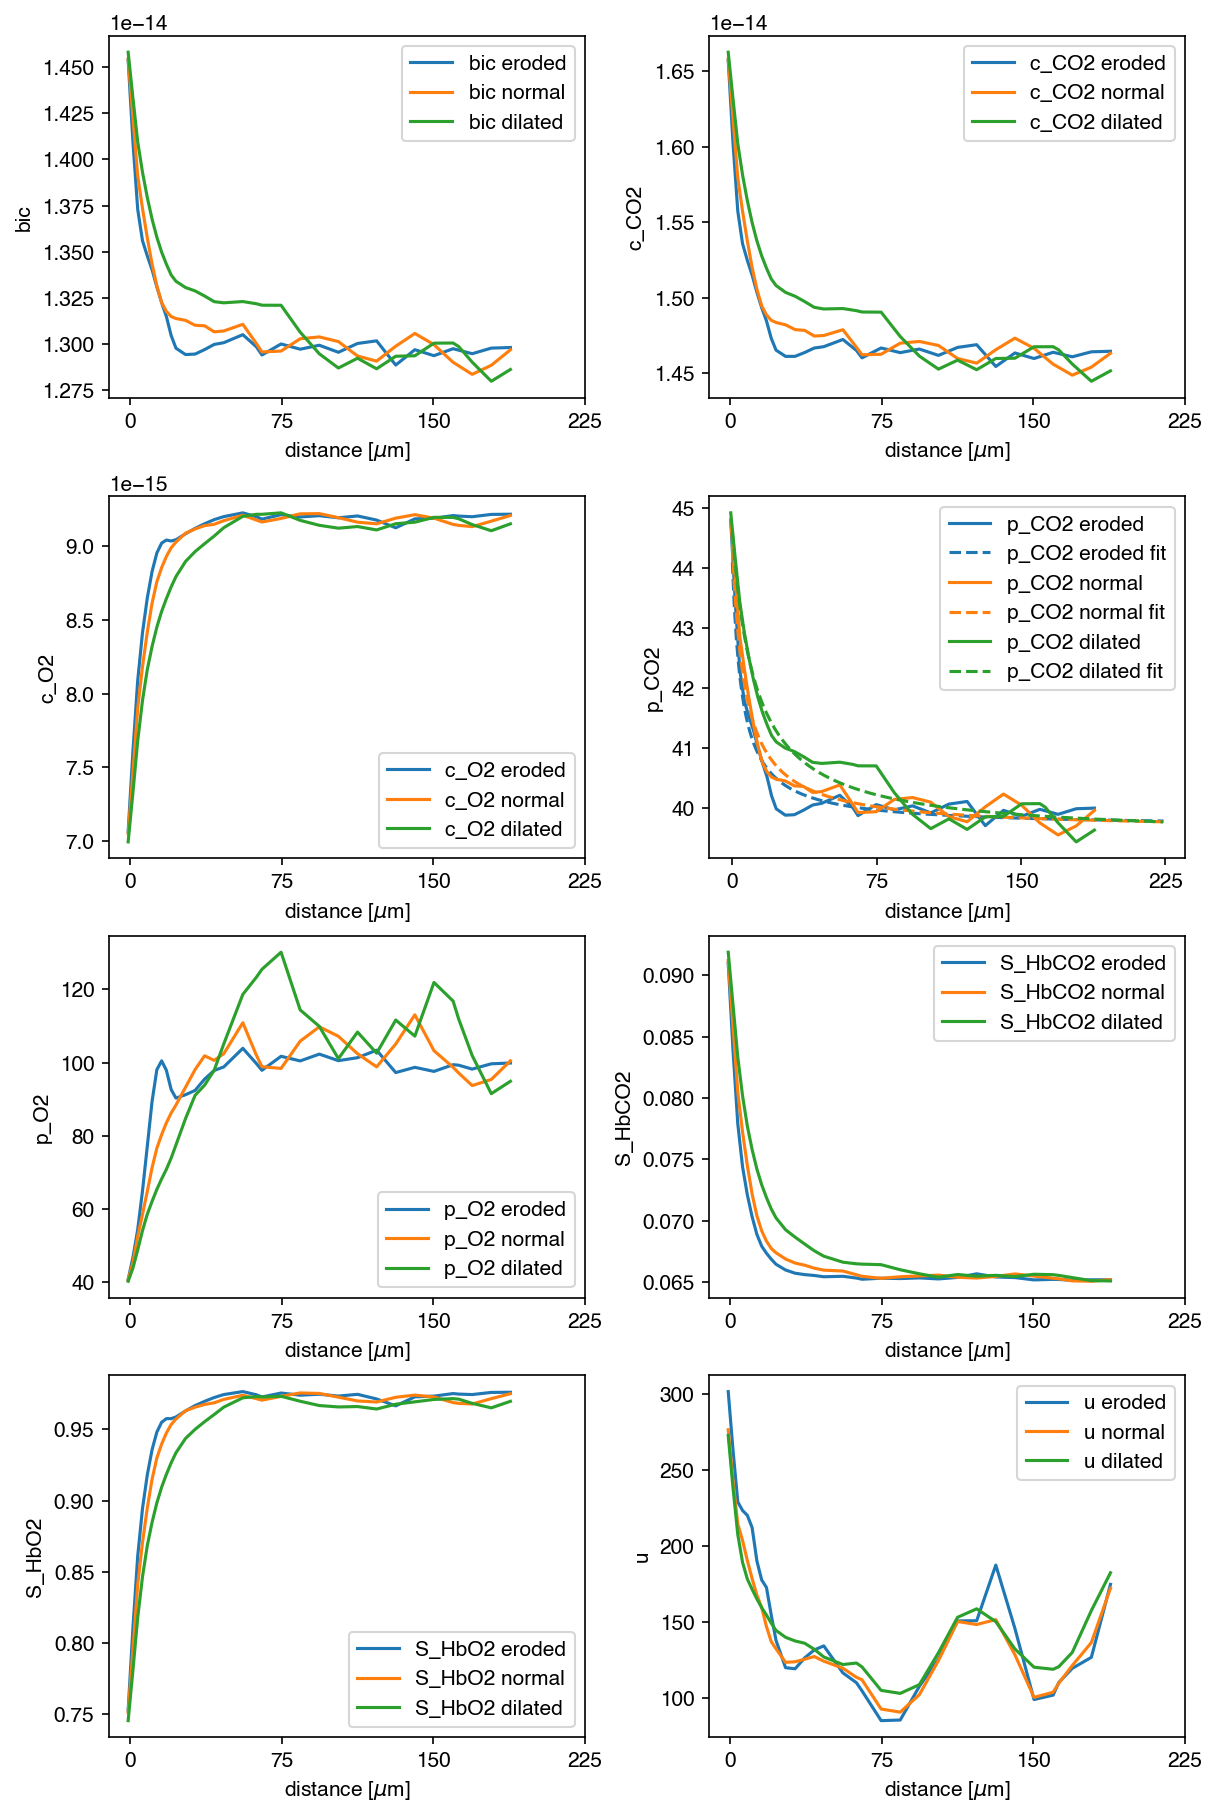

In [50]:
# Plotting RVE slice-averaged data in a normal, dilated and eroded mesh. 
# Values of these slice averages were computed manually in Paraview using a custom Filter.

fig, axs = plt.subplots(4,2, figsize=(8,12), dpi=150, layout='constrained')

reds = sns.color_palette("tab10", 3)

axs = np.ravel(axs)

for i in range(8):

    _field = fields[i].strip("_")
    
    j = 0
    for k in range(3):
        kw = kws[k]
        if kw == "eroded":
            axs[i].plot(eroded_data[_field][0], eroded_data[_field][1], color=reds[k], label=_field + " " + kw)
            if _field in fitkws:
                axs[i].plot(np.arange(225), eroded_data_fit[_field], '--', color=reds[k], label=_field + " " + kw + " fit")
        elif kw == "normal":
            axs[i].plot(normal_data[_field][0], normal_data[_field][1], color=reds[k], label=_field + " " + kw)
            if _field in fitkws:
                axs[i].plot(np.arange(225), normal_data_fit[_field], '--', color=reds[k], label=_field + " " + kw + " fit")        
        elif kw == "dilated":
            axs[i].plot(dilated_data[_field][0], dilated_data[_field][1], color=reds[k], label=_field + " " + kw)
            if _field in fitkws:
                axs[i].plot(np.arange(225), dilated_data_fit[_field], '--', color=reds[k], label=_field + " " + kw + " fit")     

        axs[i].yaxis.set_tick_params(labelbottom=True)
        axs[i].set_xticks([0,75,150,225])
        axs[i].legend()
        axs[i].set_xlabel(r"distance [$\mu$m]")
        axs[i].set_ylabel(_field)

axs = np.reshape(axs, (4,2))

plt.show()

In [51]:
# Deprecated - Levenberg-Marquardt algorithm for solving the nonlinear least-squares problem of fitting both models.}

# print("\n dilated")
# print("O_2")
# p_O2_slice_avg_dilated_fit_scipy, p1 = fit_model(reg_model_O2, x_O2_slice_avg_dilated[:23], p_O2_slice_avg_dilated[:23], p0 = [100,-0.01])
# print("CO_2")
# p_CO2_slice_avg_dilated_fit_scipy, q1  = fit_model(reg_model_CO2, x_CO2_slice_avg_dilated[:26], p_CO2_slice_avg_dilated[:26])
# print("\n normal")
# print("O_2")
# p_O2_slice_avg_normal_fit_scipy, p2 = fit_model(reg_model_O2, x_O2_slice_avg_normal[:28], p_O2_slice_avg_normal[:28], p0 = p1)
# print("CO_2")
# p_CO2_slice_avg_normal_fit_scipy, q2 = fit_model(reg_model_CO2, x_CO2_slice_avg_normal[:28], p_CO2_slice_avg_normal[:28], p0 = q1)
# print("\n eroded")
# print("O_2")
# p_O2_slice_avg_eroded_fit_scipy, p3 = fit_model(reg_model_O2, x_O2_slice_avg_eroded[:27], p_O2_slice_avg_eroded[:27], p0 = p2)
# print("CO_2")
# p_CO2_slice_avg_eroded_fit_scipy, q3 = fit_model(reg_model_CO2, x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27], p0 = q2)

In [52]:
# # Fitting

# # NumPy polyval
# n = 2

# p_O2_slice_avg_dilated_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_dilated[:23], p_O2_slice_avg_dilated[:23], n), np.arange(225))
# p_CO2_slice_avg_dilated_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_dilated[:26], p_CO2_slice_avg_dilated[:26], n), np.arange(225))

# p_O2_slice_avg_normal_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_normal[:28], p_O2_slice_avg_normal[:28], n), np.arange(225))
# p_CO2_slice_avg_normal_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_normal[:28], p_CO2_slice_avg_normal[:28], n), np.arange(225))

# p_O2_slice_avg_eroded_fit_numpy = np.polyval(np.polyfit(x_O2_slice_avg_eroded[:27], p_O2_slice_avg_eroded[:27], n), np.arange(225))
# p_CO2_slice_avg_eroded_fit_numpy = np.polyval(np.polyfit(x_CO2_slice_avg_eroded[:27], p_CO2_slice_avg_eroded[:27], n), np.arange(225))

  plt.savefig("./figs/porosities1.pdf", transparent=True)

  fig.canvas.print_figure(bytes_io, **kw)



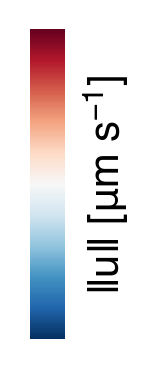

In [53]:
# Velocity colorbar

fig, ax = plt.subplots(figsize=(0.15,1.34), dpi=300, layout='constrained')

cmap = mpl.colormaps['RdBu_r']
norm = mpl.colors.Normalize(vmin=0, vmax=500)

cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='vertical', label=r'$\mathdefault{\|u\|}$ [$\mathdefault{\mu}$m s$\mathdefault{^{-1}}$]')

cb.outline.set_visible(False)
cb.ax.set_yticks([])
cb.ax.tick_params(labelsize=10)

plt.savefig("./figs/porosities1.pdf", transparent=True)

In [54]:
# Inlet blood velocity testing

us = [80, 150, 250, 500, 1000]
results_us = {}

for u_in in us:

    model.p_params["uin"] = u_in
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 4
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_us[f"{u_in}"] = model.results_dict

Problem instanced.
Pressure field found.
Folder did not exist, created.
Folder did not exist, created.
Finite element is CG


2024-04-17 15:12:50.854 (3204.490s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:50.975 (3204.610s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:51.015 (3204.650s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.95012e-12 (tol = 1e-08) r (rel) = 5.23442e-16(tol = 1e-08)
2024-04-17 15:12:51.015 (3204.650s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-17 15:12:51.607 (3205.243s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:52.196 (3205.832s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:52.331 (3205.967s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 75.3666 (tol = 1e-08) r (rel) = 0.209608(tol = 1e-08)
2024-04-17 15:12:52.741 (3206.376s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:52.883 (3206.519s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 28.2926 (tol = 1e-08) r (rel) = 0.078687(tol = 1e-08)
2024-04-17 15:12:53.324 (3206.959s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:53.457 (3207.093s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 6 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-17 15:12:55.192 (3208.828s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:55.776 (3209.412s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:55.929 (3209.564s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 12.4749 (tol = 1e-08) r (rel) = 0.0982085(tol = 1e-08)
2024-04-17 15:12:56.368 (3210.003s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:56.520 (3210.156s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.326874 (tol = 1e-08) r (rel) = 0.00257331(tol = 1e-08)
2024-04-17 15:12:56.933 (3210.568s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:57.071 (3210.707s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-17 15:12:58.295 (3211.930s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:58.851 (3212.487s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:58.988 (3212.624s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 5.60862 (tol = 1e-08) r (rel) = 0.0631648(tol = 1e-08)
2024-04-17 15:12:59.382 (3213.017s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:12:59.518 (3213.153s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0623278 (tol = 1e-08) r (rel) = 0.00070194(tol = 1e-08)
2024-04-17 15:12:59.916 (3213.551s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:00.054 (3213.689s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-17 15:13:01.208 (3214.844s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:01.781 (3215.417s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:01.927 (3215.563s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.32982 (tol = 1e-08) r (rel) = 0.046905(tol = 1e-08)
2024-04-17 15:13:02.380 (3216.016s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:02.521 (3216.156s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0172814 (tol = 1e-08) r (rel) = 0.000243432(tol = 1e-08)
2024-04-17 15:13:02.950 (3216.586s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:03.090 (3216.725s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 0.9490804672241211 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 142), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 143), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 144), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 145), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (

2024-04-17 15:13:06.371 (3220.007s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:06.482 (3220.118s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:06.523 (3220.159s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.71242e-12 (tol = 1e-08) r (rel) = 4.91972e-16(tol = 1e-08)
2024-04-17 15:13:06.523 (3220.159s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-17 15:13:07.147 (3220.783s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:07.757 (3221.392s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:07.892 (3221.528s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 77.8495 (tol = 1e-08) r (rel) = 0.209901(tol = 1e-08)
2024-04-17 15:13:08.300 (3221.936s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:08.440 (3222.075s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 30.7654 (tol = 1e-08) r (rel) = 0.0829508(tol = 1e-08)
2024-04-17 15:13:08.944 (3222.580s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:09.087 (3222.723s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 7 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-17 15:13:11.347 (3224.983s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:11.934 (3225.570s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:12.080 (3225.715s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 13.6543 (tol = 1e-08) r (rel) = 0.101143(tol = 1e-08)
2024-04-17 15:13:12.480 (3226.116s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:12.617 (3226.253s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.377309 (tol = 1e-08) r (rel) = 0.0027949(tol = 1e-08)
2024-04-17 15:13:13.014 (3226.650s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:13.153 (3226.789s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-17 15:13:14.330 (3227.966s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:14.909 (3228.545s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:15.046 (3228.681s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.35141 (tol = 1e-08) r (rel) = 0.065915(tol = 1e-08)
2024-04-17 15:13:15.464 (3229.100s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:15.607 (3229.243s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0747786 (tol = 1e-08) r (rel) = 0.000776052(tol = 1e-08)
2024-04-17 15:13:16.025 (3229.661s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:16.188 (3229.824s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-17 15:13:17.367 (3231.003s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:17.943 (3231.579s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:18.081 (3231.717s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.89471 (tol = 1e-08) r (rel) = 0.0497338(tol = 1e-08)
2024-04-17 15:13:18.509 (3232.144s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:18.648 (3232.283s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0227025 (tol = 1e-08) r (rel) = 0.000289901(tol = 1e-08)
2024-04-17 15:13:19.069 (3232.704s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:19.208 (3232.844s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 0.923947811126709 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 199), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 200), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 201), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 2), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 202), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (B

2024-04-17 15:13:22.436 (3236.072s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:22.547 (3236.182s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:22.587 (3236.222s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.75092e-12 (tol = 1e-08) r (rel) = 4.97117e-16(tol = 1e-08)
2024-04-17 15:13:22.587 (3236.223s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-17 15:13:23.170 (3236.806s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:23.744 (3237.380s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:23.908 (3237.543s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 81.5315 (tol = 1e-08) r (rel) = 0.210316(tol = 1e-08)
2024-04-17 15:13:24.383 (3238.018s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:24.528 (3238.163s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 34.3601 (tol = 1e-08) r (rel) = 0.0886341(tol = 1e-08)
2024-04-17 15:13:25.000 (3238.636s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-17 15:13:25.138 (3238.773s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

KeyboardInterrupt: 

In [ ]:
# pH testing

u_in = 80
pHs_rbc = [7.0, 7.2, 7.4, 7.6, 7.8] 
pHs_pla = [(pH_rbc - 1.357)/0.795 for pH_rbc in pHs_rbc]
################ Esto cambia RBC pero no pla, y falta incorporar p_H_pla en el modelo!
results_pHs = {}

for pH_rbc, pH_pla in zip(pHs_rbc, pHs_pla):
    model.p_params["uin"] = u_in
    model.dash_params["pH_rbc"] = pH_rbc
    model.dash_params["pH_pla"] = pH_pla
    print(f"pH_rbc = {pH_rbc}, pH_pla = {pH_pla}")
    p, u = model.Perfusion(domain, plot=False, save=True)

    p_val = 0
    guess = model.GasExchange(domain, guess=None, save=False, 
                              plot=False, p_val = p_val, 
                              postprocess=False, plot_lines=False)
    N = 4
    for i in range(N):
        p_val += 1/N
        if i != N-1:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=False, plot_lines=False)
        else:
            guess = model.GasExchange(domain, guess=guess, save=False, 
                                      plot=False, p_val = p_val, 
                                      postprocess=True, plot_lines=True)
            
    results_pHs[f"{pH_rbc}"] = model.results_dict

pH_rbc = 7.0, pH_pla = 7.098113207547169
Problem instanced.
Pressure field found.
Finite element is CG


2024-04-12 21:39:12.813 (1198.117s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:12.930 (1198.234s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:12.973 (1198.277s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.07894e-12 (tol = 1e-08) r (rel) = 5.41354e-16(tol = 1e-08)
2024-04-12 21:39:12.973 (1198.277s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-12 21:39:13.651 (1198.955s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:14.241 (1199.545s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:14.386 (1199.690s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 129.211 (tol = 1e-08) r (rel) = 0.261676(tol = 1e-08)
2024-04-12 21:39:14.827 (1200.131s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:14.972 (1200.276s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 34.3362 (tol = 1e-08) r (rel) = 0.069537(tol = 1e-08)
2024-04-12 21:39:15.464 (1200.768s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:15.617 (1200.921s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 7 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-12 21:39:18.217 (1203.522s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:18.838 (1204.142s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:18.987 (1204.291s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 14.01 (tol = 1e-08) r (rel) = 0.0849331(tol = 1e-08)
2024-04-12 21:39:19.445 (1204.749s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:19.615 (1204.920s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.302883 (tol = 1e-08) r (rel) = 0.00183618(tol = 1e-08)
2024-04-12 21:39:20.043 (1205.347s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:20.199 (1205.503s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-12 21:39:21.469 (1206.773s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:22.076 (1207.380s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:22.245 (1207.549s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.71648 (tol = 1e-08) r (rel) = 0.0559199(tol = 1e-08)
2024-04-12 21:39:22.707 (1208.011s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:22.869 (1208.174s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0495664 (tol = 1e-08) r (rel) = 0.000412679(tol = 1e-08)
2024-04-12 21:39:23.435 (1208.739s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:23.598 (1208.902s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-12 21:39:24.868 (1210.172s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:25.507 (1210.811s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:25.664 (1210.968s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.18435 (tol = 1e-08) r (rel) = 0.0427229(tol = 1e-08)
2024-04-12 21:39:26.125 (1211.429s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:26.270 (1211.574s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0161211 (tol = 1e-08) r (rel) = 0.000164599(tol = 1e-08)
2024-04-12 21:39:26.738 (1212.042s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:26.908 (1212.212s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 4 iterations.
Starting postprocessing.
Finished postprocessing at t = 1.437835454940796 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 382), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 383), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 384), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 385), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (B

2024-04-12 21:39:30.010 (1215.314s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:30.132 (1215.436s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:30.183 (1215.487s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.70594e-12 (tol = 1e-08) r (rel) = 6.24536e-16(tol = 1e-08)
2024-04-12 21:39:30.183 (1215.487s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-12 21:39:30.799 (1216.103s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:31.459 (1216.763s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:31.601 (1216.905s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 95.4989 (tol = 1e-08) r (rel) = 0.218424(tol = 1e-08)
2024-04-12 21:39:32.020 (1217.324s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:32.160 (1217.464s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 41.4713 (tol = 1e-08) r (rel) = 0.0948526(tol = 1e-08)
2024-04-12 21:39:32.586 (1217.890s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:32.790 (1218.094s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 7 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-12 21:39:35.227 (1220.531s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:35.836 (1221.140s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:35.986 (1221.290s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 12.9121 (tol = 1e-08) r (rel) = 0.0874554(tol = 1e-08)
2024-04-12 21:39:36.407 (1221.711s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:36.554 (1221.859s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.355743 (tol = 1e-08) r (rel) = 0.00240949(tol = 1e-08)
2024-04-12 21:39:37.006 (1222.310s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:37.161 (1222.465s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-12 21:39:38.335 (1223.639s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:38.949 (1224.253s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:39.099 (1224.403s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 6.2153 (tol = 1e-08) r (rel) = 0.0577276(tol = 1e-08)
2024-04-12 21:39:39.569 (1224.873s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:39.717 (1225.021s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0568866 (tol = 1e-08) r (rel) = 0.000528362(tol = 1e-08)
2024-04-12 21:39:40.126 (1225.430s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:40.262 (1225.566s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterat

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-12 21:39:40.880 (1226.184s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 5: r (abs) = 4.98177e-13 (tol = 1e-08) r (rel) = 4.62706e-15(tol = 1e-08)
2024-04-12 21:39:40.880 (1226.184s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 5 iterations and 5 linear solver iterations.
2024-04-12 21:39:41.508 (1226.812s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:42.099 (1227.403s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:42.239 (1227.543s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.90732 (tol = 1e-08) r (rel) = 0.0443746(tol = 1e-08)
2024-04-12 21:39:42.698 (1228.002s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:42.877 (1228.181s) [main            ]       NewtonSolver.c

Problem solved in 4 iterations.
Starting postprocessing.
Finished postprocessing at t = 1.2146434783935547 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 439), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 440), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 441), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 442), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (

2024-04-12 21:39:46.257 (1231.561s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:46.377 (1231.682s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:46.421 (1231.726s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 7.85895e-12 (tol = 1e-08) r (rel) = 1.04291e-15(tol = 1e-08)
2024-04-12 21:39:46.421 (1231.726s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-12 21:39:47.072 (1232.376s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:47.671 (1232.975s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:47.809 (1233.113s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 71.8371 (tol = 1e-08) r (rel) = 0.200588(tol = 1e-08)
2024-04-12 21:39:48.261 (1233.565s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:48.414 (1233.718s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 27.7586 (tol = 1e-08) r (rel) = 0.0775094(tol = 1e-08)
2024-04-12 21:39:48.879 (1234.183s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:49.017 (1234.322s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 7 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-12 21:39:51.509 (1236.814s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:52.110 (1237.414s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:52.273 (1237.577s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 10.8791 (tol = 1e-08) r (rel) = 0.0853483(tol = 1e-08)
2024-04-12 21:39:52.736 (1238.040s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:52.882 (1238.186s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.279576 (tol = 1e-08) r (rel) = 0.00219332(tol = 1e-08)
2024-04-12 21:39:53.313 (1238.617s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:53.493 (1238.797s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-12 21:39:54.732 (1240.037s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:55.332 (1240.636s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:55.469 (1240.774s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 5.20141 (tol = 1e-08) r (rel) = 0.0562876(tol = 1e-08)
2024-04-12 21:39:55.878 (1241.182s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:56.025 (1241.329s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0521599 (tol = 1e-08) r (rel) = 0.000564453(tol = 1e-08)
2024-04-12 21:39:56.452 (1241.756s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:56.616 (1241.920s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-12 21:39:57.841 (1243.145s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:58.450 (1243.754s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:58.602 (1243.907s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.27394 (tol = 1e-08) r (rel) = 0.0432502(tol = 1e-08)
2024-04-12 21:39:59.064 (1244.368s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:59.198 (1244.502s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0170521 (tol = 1e-08) r (rel) = 0.000225265(tol = 1e-08)
2024-04-12 21:39:59.644 (1244.948s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:39:59.786 (1245.090s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 1.1556525230407715 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 496), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 497), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 498), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 499), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (

2024-04-12 21:40:03.308 (1248.612s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:03.421 (1248.725s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:03.462 (1248.766s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 8.60861e-12 (tol = 1e-08) r (rel) = 1.14228e-15(tol = 1e-08)
2024-04-12 21:40:03.462 (1248.766s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-12 21:40:04.140 (1249.445s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:04.822 (1250.126s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:04.970 (1250.274s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 49.4567 (tol = 1e-08) r (rel) = 0.18063(tol = 1e-08)
2024-04-12 21:40:05.397 (1250.701s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:05.566 (1250.870s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 12.4669 (tol = 1e-08) r (rel) = 0.0455325(tol = 1e-08)
2024-04-12 21:40:06.088 (1251.392s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:06.247 (1251.551s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 4

Problem solved in 6 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-12 21:40:08.250 (1253.554s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:08.921 (1254.225s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:09.100 (1254.404s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 8.85485 (tol = 1e-08) r (rel) = 0.0819694(tol = 1e-08)
2024-04-12 21:40:09.568 (1254.872s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:09.746 (1255.050s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.251617 (tol = 1e-08) r (rel) = 0.00232922(tol = 1e-08)
2024-04-12 21:40:10.200 (1255.504s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:10.385 (1255.690s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-12 21:40:11.704 (1257.008s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:12.365 (1257.669s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:12.524 (1257.828s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 4.08371 (tol = 1e-08) r (rel) = 0.0529368(tol = 1e-08)
2024-04-12 21:40:13.011 (1258.315s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:13.161 (1258.465s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0389515 (tol = 1e-08) r (rel) = 0.000504925(tol = 1e-08)
2024-04-12 21:40:13.649 (1258.953s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:13.800 (1259.104s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-12 21:40:15.101 (1260.406s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:15.759 (1261.063s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:15.917 (1261.221s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 2.54503 (tol = 1e-08) r (rel) = 0.0404282(tol = 1e-08)
2024-04-12 21:40:16.399 (1261.703s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:16.573 (1261.877s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0135762 (tol = 1e-08) r (rel) = 0.000215661(tol = 1e-08)
2024-04-12 21:40:17.051 (1262.355s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:17.207 (1262.512s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Starting postprocessing.
Finished postprocessing at t = 1.5093274116516113 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 553), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 554), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 555), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 556), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (

2024-04-12 21:40:21.207 (1266.511s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:21.327 (1266.631s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:21.372 (1266.676s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 9.76512e-12 (tol = 1e-08) r (rel) = 1.29556e-15(tol = 1e-08)
2024-04-12 21:40:21.372 (1266.676s) [main            ]       NewtonSolver.cpp:255   INFO| Newton solver finished in 2 iterations and 2 linear solver iterations.


Problem solved in 2 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.25


2024-04-12 21:40:22.044 (1267.348s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:22.743 (1268.047s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:22.905 (1268.209s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 29.2381 (tol = 1e-08) r (rel) = 0.147953(tol = 1e-08)
2024-04-12 21:40:23.408 (1268.712s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:23.612 (1268.916s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 3.67157 (tol = 1e-08) r (rel) = 0.0185792(tol = 1e-08)
2024-04-12 21:40:24.163 (1269.467s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:24.337 (1269.641s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 

Problem solved in 6 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.5


2024-04-12 21:40:26.410 (1271.714s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:27.133 (1272.437s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:27.298 (1272.602s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 7.16483 (tol = 1e-08) r (rel) = 0.0788536(tol = 1e-08)
2024-04-12 21:40:27.810 (1273.114s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:27.972 (1273.276s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.135138 (tol = 1e-08) r (rel) = 0.00148728(tol = 1e-08)
2024-04-12 21:40:28.428 (1273.733s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:28.587 (1273.891s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iterati

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 0.75


2024-04-12 21:40:30.030 (1275.334s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:30.729 (1276.033s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:30.906 (1276.211s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 3.10577 (tol = 1e-08) r (rel) = 0.0486266(tol = 1e-08)
2024-04-12 21:40:31.516 (1276.820s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:31.689 (1276.994s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.0277675 (tol = 1e-08) r (rel) = 0.000434751(tol = 1e-08)
2024-04-12 21:40:32.243 (1277.547s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:32.400 (1277.704s) [main            ]       NewtonSolver.cpp:36    INFO| Newton itera

Problem solved in 5 iterations.
Finite element is CG
Starting nonlinear problem with previous guess.
p_val = 1.0


2024-04-12 21:40:33.903 (1279.207s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:34.632 (1279.936s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:34.857 (1280.161s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 2: r (abs) = 1.89597 (tol = 1e-08) r (rel) = 0.0367331(tol = 1e-08)
2024-04-12 21:40:35.383 (1280.687s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:35.552 (1280.856s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iteration 3: r (abs) = 0.00731721 (tol = 1e-08) r (rel) = 0.000141766(tol = 1e-08)
2024-04-12 21:40:36.076 (1281.381s) [main            ]              petsc.cpp:698   INFO| PETSc Krylov solver starting to solve system.
2024-04-12 21:40:36.240 (1281.544s) [main            ]       NewtonSolver.cpp:36    INFO| Newton iter

Problem solved in 4 iterations.
Starting postprocessing.
Finished postprocessing at t = 1.561626672744751 s.
zs = [3.  4.5 6. ]
y_fixed = 3.0
functions: {'S_HbO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 610), 'S_HbCO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 611), 'c_O2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 612), 'c_CO2': Coefficient(FunctionSpace(Mesh(blocked element (Basix element (P, tetrahedron, 1, gll_warped, unset, False), (3,)), 0), Basix element (P, tetrahedron, 1, gll_warped, unset, False)), 613), 'bic': Coefficient(FunctionSpace(Mesh(blocked element (B

In [ ]:
func_units = ["", "", "[mM]", "[mM]", "[mM]", "[mmHg]", "[mmHg]"]
func_factor = [1, 1, 1E15, 1E15, 1E15, 1, 1]
func_names = [r"$\mathdefault{S_{HbO_2}}$", r"$\mathdefault{S_{HbCO_2}}$", r"$\mathdefault{c_{O_2}}$", r"$\mathdefault{c_{CO_2}}$", r"[HCO$\mathdefault{_3^-}$]", r"$\mathdefault{p_{O_2}}$", r"$\mathdefault{p_{CO_2}}$"]
func_tags = ["S_HbO2", "S_HbCO2", "c_O2", "c_CO2", "HCO3", "p_O2", "p_CO2"]

KeyError: '4.0'

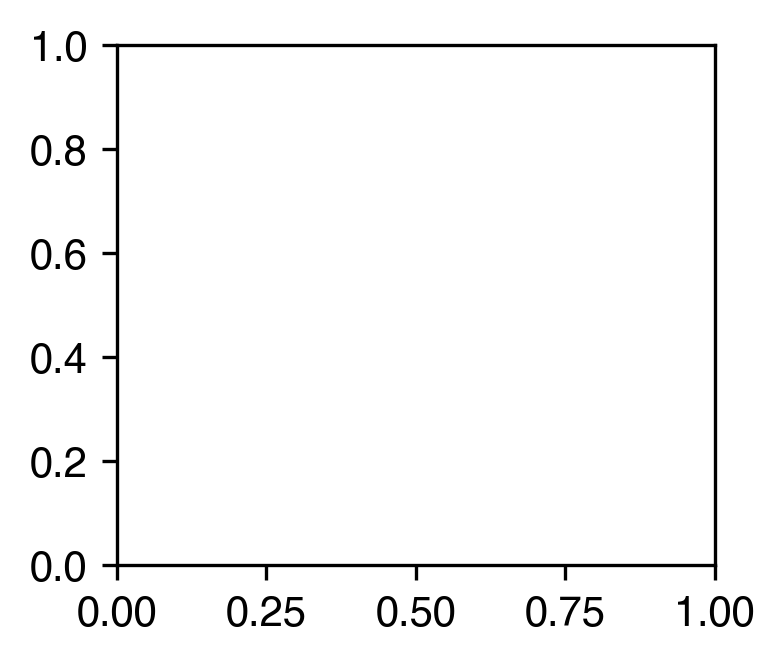

In [ ]:
# Velocity-dependent fields

colors = sns.color_palette("viridis", len(us))
ticks = [[0.7,0.8,0.9,1.0], [0.06, 0.07, 0.08, 0.09, 0.10], [7,8,9,10], [14,15,16,17], [13,14,15], [40,60,80,100], [40,41,42,43,44,45]]

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(2.5,2.1), dpi=300, layout='constrained')
    
    i = 0
    # if j == 0:
    #     ax.plot(model.x, 0.977*np.ones_like(model.x), '--', color='black')
    for u_curr in results_us.keys():
    
        ax.plot(model.x, func_factor[j]*results_us[u_curr][func_name]['4.0'], color=colors[i], label=f"{u_curr}")
        i += 1
    
    ax.set_ylabel(rf"{func_names[j]}" + rf"{func_units[j]}", size=10)
    ax.set_xlabel(r"x [$\mathdefault{\mu}$m]", size=10)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_yticks(ticks[j])
    # ax.set_ylim(min(results_us[u_curr][func_name]['4.0']), max(results_us[u_curr][func_name]['4.0']))
    ax.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"./figs/uvar_{func_tags[j]}.pdf", transparent=True)
    j += 1

In [ ]:
# pH-dependent fields

colors = sns.color_palette("viridis", len(pHs_rbc))

ticks = [[0.6,0.7,0.8,0.9,1.0], [0.0, 0.1, 0.2, 0.3, 0.4], [5,6,7,8,9,10], [0,10,20,30,40,50,60], [0,10,20,30,40,50,60], [40,60,80,100], [40,41,42,43,44,45]]

j = 0
for func_name in model.func_dict.keys():
    fig, ax = plt.subplots(figsize=(2.5,2.1), dpi=300)
    i = 0
    # if j == 0:
    #     ax.plot(model.x, 0.977*np.ones_like(model.x), '--', color='black')
    for pH_curr in results_pHs.keys():
        ax.plot(model.x, func_factor[j]*results_pHs[pH_curr][func_name]['4.0'], 
                color=colors[i], label=f'{pH_curr}')
        i += 1
    ax.set_ylabel(rf"{func_names[j]}" + rf"{func_units[j]}", size=10)
    ax.set_xlabel(r"x [$\mathdefault{\mu}$m]", size=10)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_yticks(ticks[j])
    # if j == 0:
        # ax.set_yticks([0.7, 0.8, 0.9, 1.0])
    # ax.set_ylim(min(results_us[u_curr][func_name]['4.0']), max(results_us[u_curr][func_name]['4.0']))
    ax.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"./figs/pHvar_{func_tags[j]}.pdf", transparent=True)

    j += 1